# Ejercicio 3

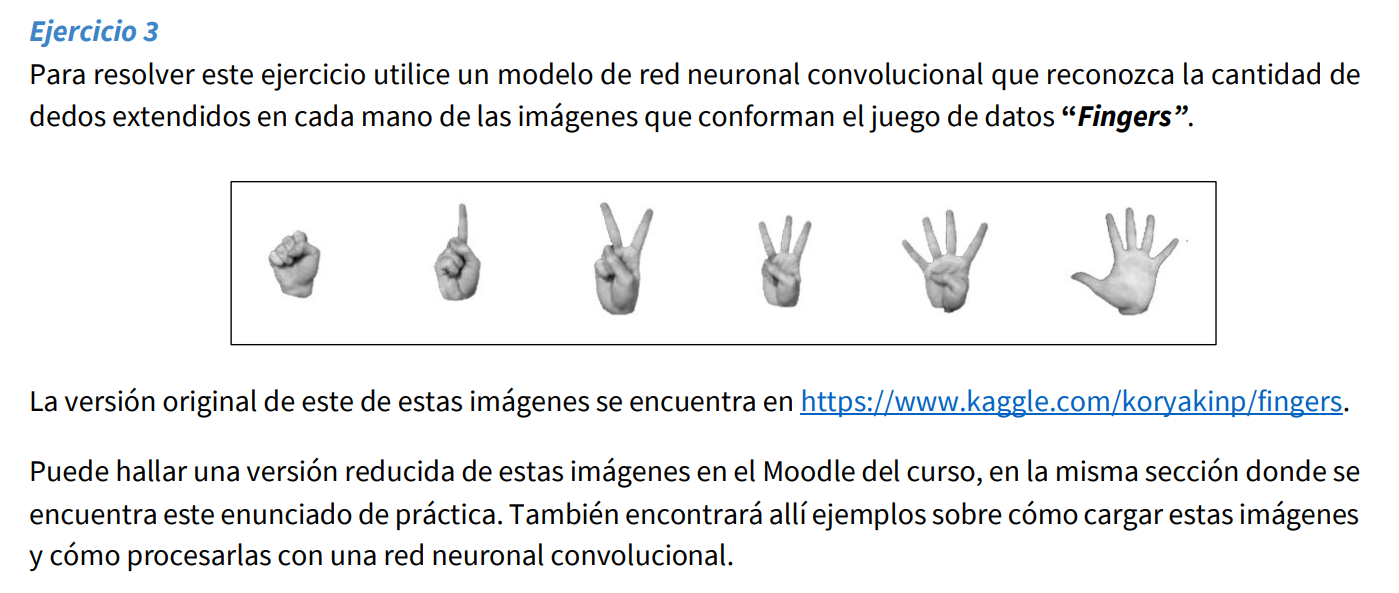

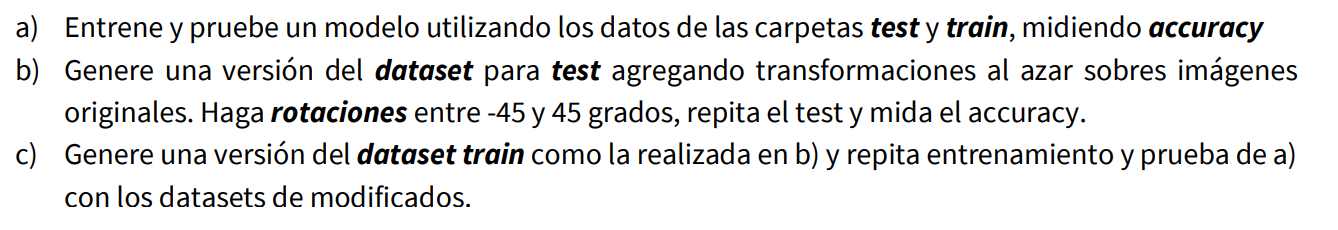

In [1]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from skimage import io
from skimage.transform import rotate
import numpy as np
import glob
import matplotlib.pyplot as plt

In [3]:
def import_data(img_list):
    img_data = []
    label_data = []
    
    img_count = len(img_list)
    for i in range(0,img_count):
        img = img_list[i]
        img_read = io.imread(img)
        img_read = img_read/img_read.max() # normaliza pixeles entre 0 y 1
        img_read = img_read.reshape((*img_read.shape,1)) # formatea imagen como requiere TF
        img_data.append(img_read)          # agrega a lista de imágenes a procesar
        label_data.append(img[-6])         # extrae cant. dedos del nombre del archivo
        # muestra progreso en la carga
        if i % 100 == 0:
            print("\rCargando imágenes: %6.2f%%" % (100*i/img_count), end="")
    print("\rCargando imágenes:  100.00%% (%d) \n" % img_count)
        
    return np.array(img_data), np.array(label_data)

In [12]:
IMG_ERROR = 'No hay imágenes para cargar. Verificar que la ruta sea correcta y que la carpeta tenga imagenes con la extensión usada'
DATOS_DIR = "C:\\Users\\VICTUS\\Documents\\2024\\Deep Learning UNLP\\Datos\\fingers\\"

# lista de archivos a procesar
train_img_list = glob.glob(DATOS_DIR + "train/*.png")

# Verificar y mostrar las imágenes encontradas
if len(train_img_list) == 0:
    print(IMG_ERROR)
else:
    print(f"Se encontraron {len(train_img_list)} imágenes para entrenamiento.")
    # Mostrar algunas rutas para verificar
    for img in train_img_list[:5]:
        print("Ejemplo de archivo de imagen encontrado:", img)

# Continúa con el procesamiento de las imágenes
xtrain, ytrain = import_data(train_img_list)


Se encontraron 17999 imágenes para entrenamiento.
Ejemplo de archivo de imagen encontrado: C:\Users\VICTUS\Documents\2024\Deep Learning UNLP\Datos\fingers\train\00048bba-979b-4f84-b833-5bbbb082b582_0L.png
Ejemplo de archivo de imagen encontrado: C:\Users\VICTUS\Documents\2024\Deep Learning UNLP\Datos\fingers\train\000547a2-d456-4b16-b351-12ca9b40e390_0L.png
Ejemplo de archivo de imagen encontrado: C:\Users\VICTUS\Documents\2024\Deep Learning UNLP\Datos\fingers\train\000d9961-8136-4dee-9820-86e178777958_0L.png
Ejemplo de archivo de imagen encontrado: C:\Users\VICTUS\Documents\2024\Deep Learning UNLP\Datos\fingers\train\0010095b-2e3d-4517-a511-1f688c378f96_5L.png
Ejemplo de archivo de imagen encontrado: C:\Users\VICTUS\Documents\2024\Deep Learning UNLP\Datos\fingers\train\00147c9a-67f5-4e86-a56b-681f0815ef2b_5R.png
Cargando imágenes:  100.00% (17999) 



In [13]:
test_img_list = glob.glob(DATOS_DIR + "test/*.png")

xtest, ytest = import_data(test_img_list)

Cargando imágenes:  100.00% (3600) 



### Preparacion del modelo

In [14]:
EPOCAS = 15
LOTES  = 50
IMG_SIZE = (64, 64, 1)
N_CLASSES = len(np.unique(ytrain))

# conviertes el id de la clase en "one hot encoding": 3 => [0,0,0,1,0,0]
ytest = to_categorical(ytest, num_classes = N_CLASSES)
ytrain = to_categorical(ytrain, num_classes = N_CLASSES)

In [15]:
# separa los datos y clase en grupo de entrenamiento y validacion
x_train, x_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size = 0.20, shuffle = True)

In [16]:
# %% construye le modelo
def build_model(img_size, classes):
    model = Sequential()

    model.add(Input(shape=img_size))
    model.add(Conv2D(8, kernel_size=(3,3), strides=(2,2), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2)))  
    model.add(Conv2D(16, kernel_size=(3,3), strides=(2,2), activation='relu')) 
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    model.add(Dense(10, activation = 'tanh'))
    model.add(Dense(classes, activation = 'softmax'))

    model.summary()
    return model

In [17]:
# obtiene la arquitectura para el modelo y lo compila
model = build_model(IMG_SIZE, N_CLASSES)
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
 

# entrena el modelo y guarda la historia del progreso    
H = model.fit(x = x_train, y = y_train, batch_size = LOTES, epochs = EPOCAS, validation_data = (x_val, y_val))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,764 (10.80 KB)

 Trainable params: 2,764 (10.80 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4804 - loss: 1.4020 - val_accuracy: 0.9722 - val_loss: 0.1984
Epoch 2/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.1538 - val_accuracy: 0.9878 - val_loss: 0.0746
Epoch 3/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0694 - val_accuracy: 0.9950 - val_loss: 0.0402
Epoch 4/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9959 - loss: 0.0368 - val_accuracy: 0.9981 - val_loss: 0.0233
Epoch 5/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9974 - loss: 0.0229 - val_accuracy: 0.9989 - val_loss: 0.0153
Epoch 6/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9984 - loss: 0.0157 - val_accuracy: 0.9983 - val_loss: 0.0133
Epoch 7/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9995 - loss: 0.0106 - val_accuracy: 0.9992 - val_loss: 0.0084
Epoch 8/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 0.0077 - val_accuracy: 0.

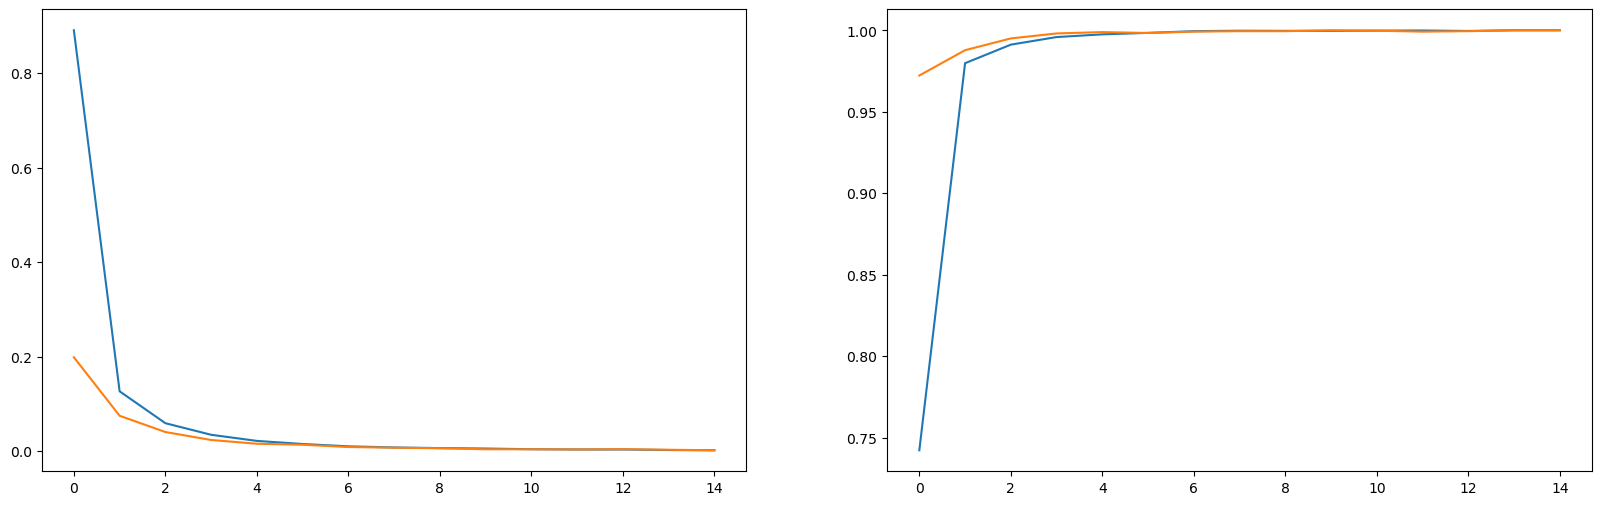

<Figure size 640x480 with 0 Axes>

In [18]:
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")


ACCURACY

In [19]:

# %% evalua el modelo para entrenamiento
pred = model.evaluate(xtrain, ytrain, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(xtest, ytest, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))


Efectividad del modelo con datos de entrenamiento: 100.00%
Efectividad del modelo con datos de Prueba.......:  99.97%


### Inciso b - Transformaciones al azar

In [20]:
from random import random


def rotar_al_azar(data_imgs, max_ang):
    result = np.zeros_like(data_imgs) #se crea un nuevo array que tiene el mismo formato y forma que data_imgs.
    for i,img in enumerate(data_imgs): #se itera a traves de cada imagen
        ang = (random()-0.5)*max_ang #se determina el angulo de rotacion para cada imagen
        result[i] = rotate(img, ang) # se rota la imagen por el angulo que se determino arriba

    return result


xtest_rot = rotar_al_azar(xtest, 45)

Repita el test y mida el accuraxy

In [21]:
# evalua el modelo con los datos de testeo
pred = model.evaluate(xtest_rot, ytest, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))


Efectividad del modelo con datos de Prueba.......:  86.33%


### Inciso c

Genere una versión del dataset train como la realizada en b) y repita entrenamiento y prueba de a)
con los datasets de modificados.

In [22]:
def rotar_al_azar(data_imgs, max_ang):
    result = np.zeros_like(data_imgs) #se crea un nuevo array que tiene el mismo formato y forma que data_imgs.
    for i,img in enumerate(data_imgs): #se itera a traves de cada imagen
        ang = (random()-0.5)*max_ang #se determina el angulo de rotacion para cada imagen
        result[i] = rotate(img, ang) # se rota la imagen por el angulo que se determino arriba

    return result


xtrain_rot = rotar_al_azar(xtrain, 45)

In [24]:
# separa los datos y clase en grupo de entrenamiento y validacion
x_train2, x_val2, y_train2, y_val2 = train_test_split(xtrain_rot, ytrain, test_size = 0.20, shuffle = True)

In [25]:

#repito el entrenamiento 
H2 = model.fit(x = x_train2, y = y_train2, batch_size = LOTES, epochs = EPOCAS, validation_data = (x_val2, y_val2))


Epoch 1/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9178 - loss: 0.2647 - val_accuracy: 0.9806 - val_loss: 0.0734
Epoch 2/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0652 - val_accuracy: 0.9881 - val_loss: 0.0409
Epoch 3/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0406 - val_accuracy: 0.9939 - val_loss: 0.0307
Epoch 4/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - loss: 0.0314 - val_accuracy: 0.9958 - val_loss: 0.0244
Epoch 5/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9957 - loss: 0.0223 - val_accuracy: 0.9961 - val_loss: 0.0193
Epoch 6/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9958 - loss: 0.0199 - val_accuracy: 0.9956 - val_loss: 0.0180
Epoch 7/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9964 - loss: 0.0173 - val_accuracy: 0.9942 - val_loss: 0.0210
Epoch 8/15
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9975 - loss: 0.0150 - val_accuracy: 0.

In [26]:

# %% evalua el modelo para entrenamiento
pred = model.evaluate(x_train2, y_train2, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))

# evalua el modelo con los datos de testeo
pred = model.evaluate(x_val2, y_val2, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%" % (pred[1]*100))


Efectividad del modelo con datos de entrenamiento:  99.96%
Efectividad del modelo con datos de Prueba.......:  99.86%


In [28]:
# %% evalua el modelo para entrenamiento
pred = model.evaluate(xtrain_rot, ytrain, verbose=0)
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (pred[1]*100))




Efectividad del modelo con datos de entrenamiento:  99.94%
